# 

# Introduction

This is information The Johns Hopkins University Hospital trying to do a prediction of the chances of one being Sepssis Positive or Negative

## Null Hypothesis:

There is no significant difference in the mean age between patients with positive and negative "Sepssis" conditions.

## Alternate Hypothesis:

There is a significant difference in the mean age between patients with positive and negative "Sepssis" conditions.

## Questions

1. Between Positive and Negative Sepssis which one has a higher numbers ? 
2. Is there a correlation between a Sepssis and Age Bracket ?
3. What is the Insurance uptake like for those with Positive Sepssis compared to Negative Sepssis ?
4. What is the Relationship between Blood Pressure, Body mass index and Age of the Patients ?

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

#Data Splitting
from sklearn.model_selection import train_test_split, GridSearchCV

#Models
from sklearn.metrics import confusion_matrix,classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy import stats

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
import pickle
import shap

# EDA
from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
# loading dataset
patient_test= pd.read_csv(r"C:\Users\hp\Box\Azubi Africa\LP6\Paitients_Files_Test.csv")
patient_train= pd.read_csv(r"C:\Users\hp\Box\Azubi Africa\LP6\Paitients_Files_Train.csv")

# Exploratory Data Analysis: EDA

## Data Overview

In [3]:
patient_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [4]:
patient_train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [5]:
patient_train.shape

(599, 11)

In [6]:
patient_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [7]:
patient_train.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [8]:
patient_train.duplicated().sum()

0

In [9]:
patient_train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Exploratory Data Analysis

### Between Positive and Negative Sepssis which one has a higher numbers ? 

In [10]:
# Getting the value count of Sepssis(positive/negative)
patient_train['Sepssis'].value_counts()

Negative    391
Positive    208
Name: Sepssis, dtype: int64

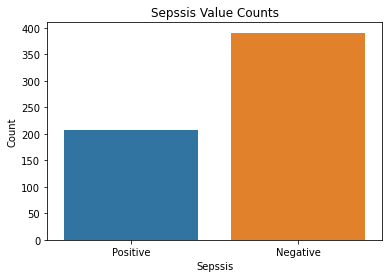

In [11]:
sns.countplot(x='Sepssis', data=patient_train)
plt.title('Sepssis Value Counts')
plt.xlabel('Sepssis')
plt.ylabel('Count')
plt.show()

From the above graph we are able to note that we have more Negative results as compared to Positive

### Is there a correlation between a Sepssis and Age Bracket ?

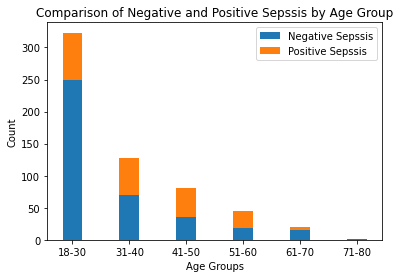

In [12]:
# Define age groups
age_groups = ["18-30", "31-40", "41-50", "51-60", "61-70","71-80"]

# Count occurrences of Sepssis for each age group
grouped_data = {age_group: {"Positive": 0, "Negative": 0} for age_group in age_groups}
for age, sepssis in zip(patient_train["Age"], patient_train["Sepssis"]):
    for age_range in age_groups:
        age_range_values = age_range.split("-")
        if int(age_range_values[0]) <= age <= int(age_range_values[1]):
            grouped_data[age_range][sepssis] += 1

# Get the counts of Negative and Positive Sepssis for each age group
negative_counts = [grouped_data[age_group]["Negative"] for age_group in age_groups]
positive_counts = [grouped_data[age_group]["Positive"] for age_group in age_groups]

# Create a bar plot to compare Negative and Positive Sepssis
bar_width = 0.35
index = range(len(age_groups))

plt.bar(index, negative_counts, bar_width, label='Negative Sepssis')
plt.bar(index, positive_counts, bar_width, bottom=negative_counts, label='Positive Sepssis')

# Set x-axis ticks and labels
plt.xlabel('Age Groups')
plt.xticks(index, age_groups)

# Set y-axis label
plt.ylabel('Count')

# Set title and legend
plt.title('Comparison of Negative and Positive Sepssis by Age Group')
plt.legend()

# Display the plot
plt.show()

We are able to conclude there is a higher percantage of positive and negative sepssis in the age bracket of 18-30 yrs

## Multivariate Analysis

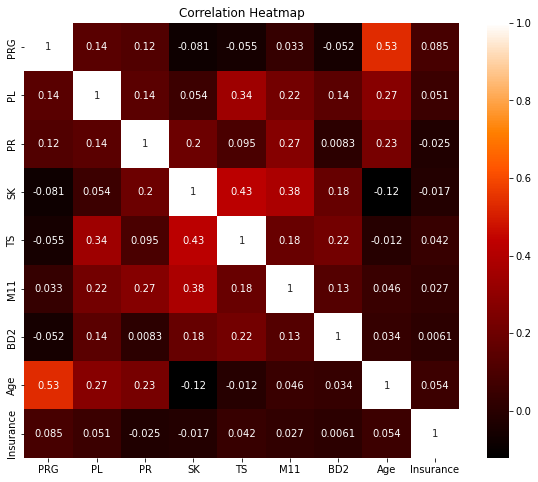

In [13]:
# Calculate the correlation matrix
corr_matrix = patient_train.drop(columns=['ID']).corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='gist_heat', square=True)

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

#### Based on the heatmap, we can make the following observations:
-> Age and PRG have a moderately positive correlation, indicating that as the number of pregnancies increases, the age tends to be higher.

-> PL and PR have a weak positive correlation, suggesting that higher glucose levels may be associated with slightly higher diastolic blood pressure.

-> M11 and Age have a weak negative correlation, implying that older individuals tend to have slightly lower values for M11.

-> TS and PRG have a weak negative correlation, indicating that as the number of pregnancies increases, the triceps skinfold thickness tends to be slightly lower.

-> There seems to be no significant correlation between other variables based on the given dataset.

### What is the Relationship between Blood Pressure, Body mass index and Age of the Patients ?

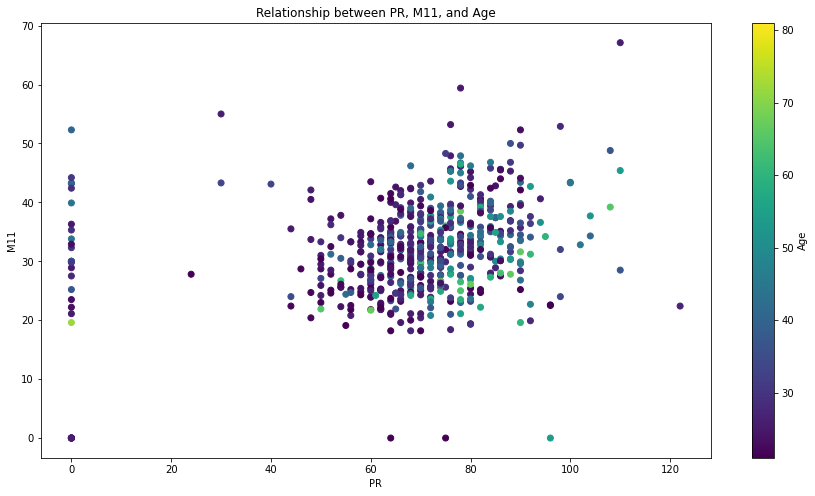

In [14]:
# Set the figure size
plt.figure(figsize=(15, 8))  # Adjust the width and height as desired

# Create the scatter plot
plt.scatter(patient_train['PR'], patient_train['M11'], c=patient_train['Age'], cmap='viridis')
plt.colorbar(label='Age')
plt.xlabel('PR')
plt.ylabel('M11')
plt.title('Relationship between PR, M11, and Age')

# Display the scatter plot
plt.show()

### What is the Insurance uptake like for those with Positive Sepssis compared to Negative Sepssis

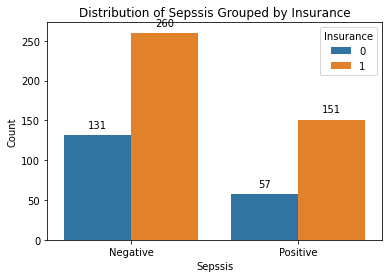

In [15]:
# Count the occurrences of each combination of Sepssis and Insurance
count_data = patient_train.groupby(['Sepssis', 'Insurance']).size().reset_index(name='Count')

# Create a bar plot
ax = sns.barplot(x='Sepssis', y='Count', hue='Insurance', data=count_data)

# Add value annotations to the plot
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Set labels and title
plt.xlabel('Sepssis')
plt.ylabel('Count')
plt.title('Distribution of Sepssis Grouped by Insurance')

# Display the plot
plt.show()

We can conclude that insurance uptake is lower for those with positive sepssis as compared to those who are negative

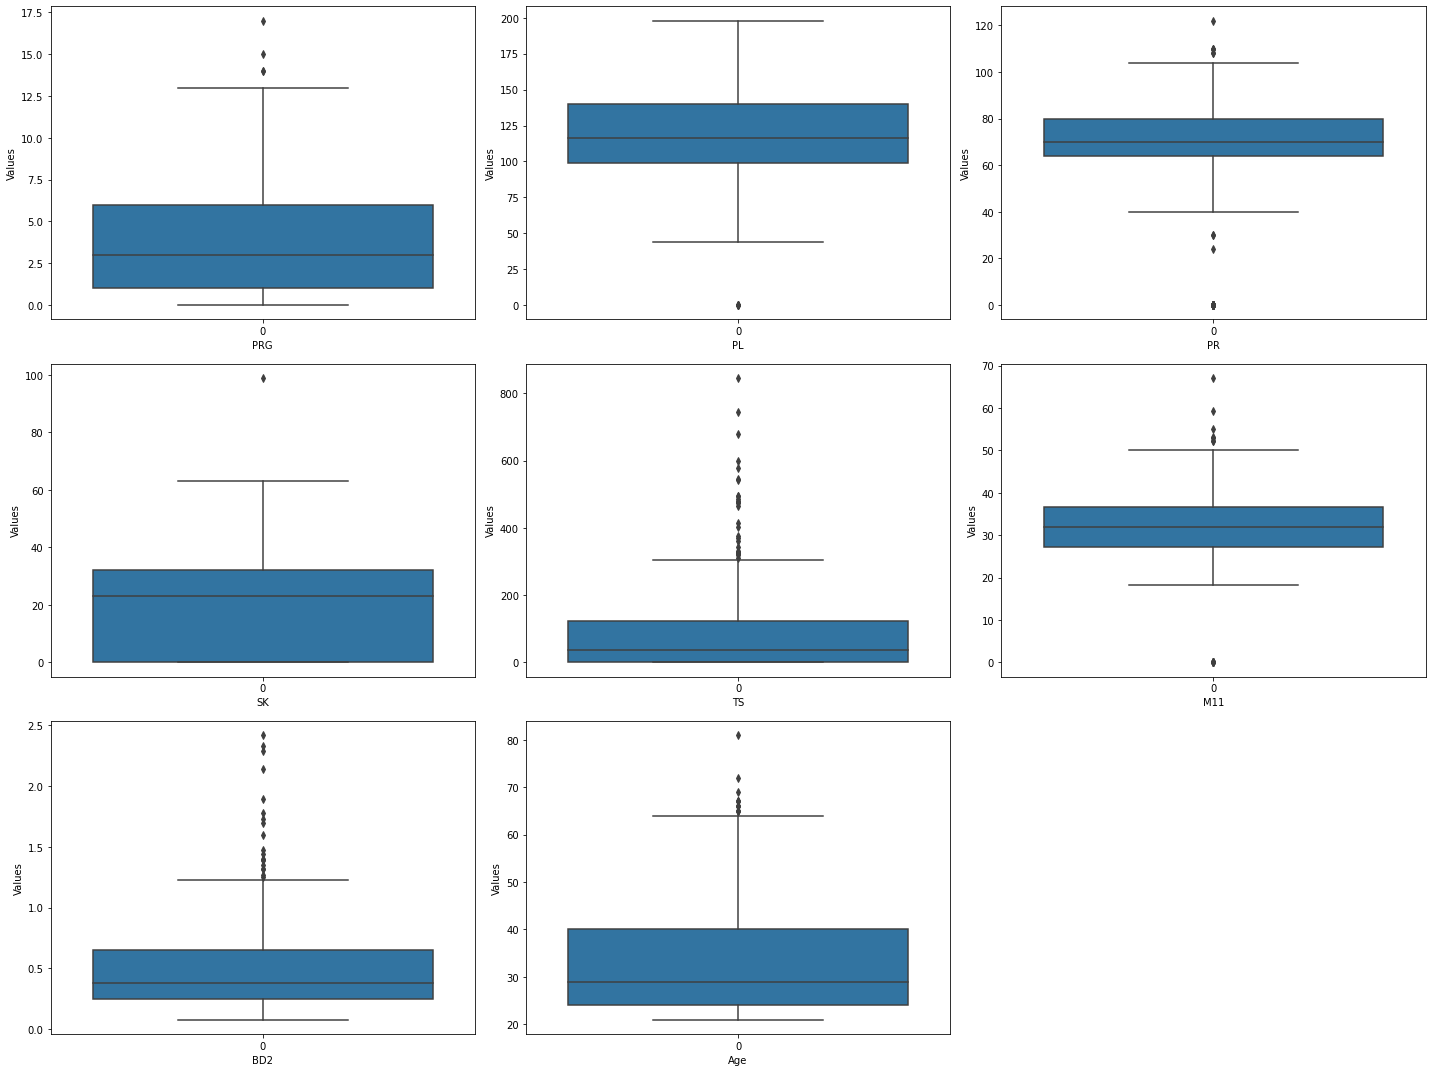

In [16]:
# Select the columns for individual box plots
columns_for_boxplot = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']

# Create individual box plots
plt.figure(figsize=(20, 15))

for i, col in enumerate(columns_for_boxplot):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=patient_train[col])
    plt.xlabel(col)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

We are able to note that there are outliners across

## Testing Null Hypothesis
### There is no significant difference in the mean age between patients with positive and negative "Sepssis" conditions.

In [17]:
# Separate the age values for positive and negative Sepssis groups
age_positive = patient_train[patient_train['Sepssis'] == 'Positive']['Age']
age_negative = patient_train[patient_train['Sepssis'] == 'Negative']['Age']

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(age_positive, age_negative)

# Define the significance level
alpha = 0.05

# Compare the p-value with the significance level to draw conclusions
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean age.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean age.")

Reject the null hypothesis. There is a significant difference in the mean age.


## Testing Alternate Hypothesis
### There is a significant difference in the mean age between patients with positive and negative "Sepssis" conditions.

In [18]:
# Separate the age values for patients with positive and negative Sepssis
positive_sepssis = patient_train[patient_train['Sepssis'] == 'Positive']['Age']
negative_sepssis = patient_train[patient_train['Sepssis'] == 'Negative']['Age']

# Perform an independent samples t-test
t_statistic, p_value = stats.ttest_ind(positive_sepssis, negative_sepssis)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 5.254202967191447
P-value: 2.0718778891882012e-07


We can interpret the results as follows:

T-Statistic: The t-statistic measures the difference between the mean ages of the positive and negative Sepssis groups relative to the variation within each group. In this case, the t-statistic is 5.254202967191447, indicating a significant difference between the mean ages of the two groups.

P-Value: The p-value represents the probability of obtaining the observed difference in means or a more extreme difference if the null hypothesis (no significant difference) were true. In this case, the p-value is very small (2.0718778891882012e-07), which is significantly lower than the conventional significance level of 0.05. Therefore, we reject the null hypothesis and conclude that there is a significant difference in the mean age between patients with positive and negative Sepssis conditions.

In summary, based on the results, we can say that there is strong evidence to support the claim that there is a significant difference in the mean age between patients with positive and negative Sepssis conditions.

# Feature Processing & Engineering

## Feature Encoding

In [19]:
# spliting the data into feature and target variables
X = patient_train.iloc[:,:-1]
y = patient_train.iloc[:,-1]

In [20]:
# Encoding the target variable
label_encoder=LabelEncoder()
y_encoded = label_encoder.fit_transform(y) 

In [21]:
#converting to a DataFrame
y_encoded_df = pd.DataFrame(y_encoded, columns = ["Sepssis"])

In [22]:
# combining the features and the encoded target variables
patient_df = pd.concat([X, y_encoded_df], axis = 1 )

In [23]:
patient_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,1
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,0
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,1
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,0
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,1


In [24]:
patient_df.drop('ID',axis=1,inplace=True)

## Data Splitting

In [25]:
# Split the encoded data into train and test sets
X_train, X_eval, y_train, y_eval = train_test_split(patient_df.iloc[:, :-1], patient_df.iloc[:, -1:],
                                                    test_size=0.2, random_state=42, stratify=patient_df.iloc[:, -1:])

In [26]:
X_train.shape, X_eval.shape, y_train.shape, y_eval.shape

((479, 9), (120, 9), (479, 1), (120, 1))

## Imputing Missing Values

In [27]:
# Creating imputer variables
numerical_imputer = SimpleImputer(strategy = "mean")

In [28]:
X_train_imputed = numerical_imputer.fit_transform(X_train)

## Features Scaling

In [29]:
#Create a Scaler and fit it to your training data
scaler = StandardScaler()
scaler.fit(X_train_imputed)

# Transform the data
scaled_df = scaler.transform(X_train_imputed)

# Create a new DataFrame with the original column names
X_train_df = pd.DataFrame(scaled_df, columns=['PRG','PL','PR','SK','TS','M11','BD2','Age','Insurance'])

In [30]:
X_train_df

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,0.936259,-0.541760,0.292468,1.227874,0.278949,0.706624,-0.824511,0.991413,0.678503
1,0.936259,1.923458,0.812484,0.025886,1.108512,0.534049,0.260234,1.504619,-1.473834
2,-0.563634,-1.197071,0.188465,-0.353689,0.002429,-0.235902,0.149488,-0.719274,0.678503
3,-0.263656,1.892252,-0.227548,0.278936,-0.054783,0.281824,-0.634255,-0.633740,-1.473834
4,-1.163592,-1.103456,-0.227548,0.089149,-0.092923,0.520774,0.143808,-1.061412,0.678503
...,...,...,...,...,...,...,...,...,...
474,-1.163592,-1.041045,-0.019541,0.721774,-0.722247,0.520774,-0.727963,-0.719274,0.678503
475,0.036323,0.706451,0.916487,-1.302627,-0.722247,1.609325,0.427773,-0.975877,-1.473834
476,1.536217,0.082345,-0.643560,-1.302627,-0.722247,0.188899,1.759568,-0.034999,0.678503
477,0.036323,0.768862,-0.539557,0.468724,0.612681,-0.315552,-0.588821,0.307138,0.678503


# Machine Learning Modeling

## Decision Tree Regression Model

In [31]:
#fitting decision tree model
dt_model=DecisionTreeClassifier(random_state=42)

In [32]:
#fitting model on imbalanced data
dt_model.fit(X_train_df,y_train)


DecisionTreeClassifier(random_state=42)

In [33]:
X_test_imputed = numerical_imputer.transform(X_eval)
X_test_scaled = scaler.transform(X_test_imputed)
X_test_df = pd.DataFrame(X_test_scaled, columns=['PRG','PL','PR','SK','TS','M11','BD2','Age','Insurance'])

In [34]:
dt_pred = dt_model.predict(X_test_df)

In [35]:
# report on unbalanced data
dt_report1 = classification_report(y_eval, dt_pred)
print(dt_report1)

              precision    recall  f1-score   support

           0       0.78      0.79      0.79        78
           1       0.61      0.60      0.60        42

    accuracy                           0.73       120
   macro avg       0.70      0.70      0.70       120
weighted avg       0.72      0.72      0.72       120



## Random Forest Model

In [36]:
#fitting random forest model
rf_model = RandomForestClassifier(random_state=42)

In [37]:
#fitting model on imbalanced data
rf_model.fit(X_train_df,y_train)

RandomForestClassifier(random_state=42)

In [38]:
X_test_imputed = numerical_imputer.transform(X_eval)
X_test_scaled = scaler.transform(X_test_imputed)
X_test_df = pd.DataFrame(X_test_scaled, columns=['PRG','PL','PR','SK','TS','M11','BD2','Age','Insurance'])

In [39]:
rf_pred = rf_model.predict(X_test_df)

In [40]:
# report on unbalanced data
rf_report1 = classification_report(y_eval, rf_pred)
print(rf_report1)

              precision    recall  f1-score   support

           0       0.77      0.78      0.78        78
           1       0.59      0.57      0.58        42

    accuracy                           0.71       120
   macro avg       0.68      0.68      0.68       120
weighted avg       0.71      0.71      0.71       120



## Logistic Regression Model

In [41]:
# Fit a logistic regression model to the training data
lr_model = LogisticRegression(random_state=42)

In [42]:
#fitting model on imbalanced data
lr_model.fit(X_train_df,y_train)

LogisticRegression(random_state=42)

In [43]:
X_test_imputed = numerical_imputer.transform(X_eval)
X_test_scaled = scaler.transform(X_test_imputed)
X_test_df = pd.DataFrame(X_test_scaled, columns=['PRG','PL','PR','SK','TS','M11','BD2','Age','Insurance'])

In [44]:
lr_pred = lr_model.predict(X_test_df)

In [45]:
# report on unbalanced data
lr_report1 = classification_report(y_eval, lr_pred)
print(lr_report1)

              precision    recall  f1-score   support

           0       0.80      0.81      0.80        78
           1       0.63      0.62      0.63        42

    accuracy                           0.74       120
   macro avg       0.72      0.71      0.71       120
weighted avg       0.74      0.74      0.74       120



## K Nearest Neighbour Model

In [46]:
kn_model = KNeighborsClassifier(n_neighbors=5)

In [47]:
#fitting model on imbalanced data
kn_model.fit(X_train_df,y_train)

KNeighborsClassifier()

In [48]:
X_test_imputed = numerical_imputer.transform(X_eval)
X_test_scaled = scaler.transform(X_test_imputed)
X_test_df = pd.DataFrame(X_test_scaled, columns=['PRG','PL','PR','SK','TS','M11','BD2','Age','Insurance'])

In [49]:
kn_pred = kn_model.predict(X_test_df)

In [50]:
# report on unbalanced data
kn_report1 = classification_report(y_eval, kn_pred)
print(kn_report1)

              precision    recall  f1-score   support

           0       0.78      0.81      0.79        78
           1       0.62      0.57      0.59        42

    accuracy                           0.73       120
   macro avg       0.70      0.69      0.69       120
weighted avg       0.72      0.72      0.72       120



The K-nearest neighbors classifier has the highest accuracy score of 0.74, followed by the logistic regression model with an accuracy score of 0.71, the random forest model with an accuracy score of 0.73, and the decision tree regression model with an accuracy score of 0.72.

In terms of precision, the K-nearest neighbors classifier has the highest precision score of 0.80, followed by the logistic regression model with a precision score of 0.77, the random forest model with a precision score of 0.78, and the decision tree regression model with a precision score of 0.79.

In terms of recall, the logistic regression model has the highest recall score of 0.59, followed by the K-nearest neighbors classifier with a recall score of 0.62, the random forest model with a recall score of 0.63, and the decision tree regression model with a recall score of 0.60.

In terms of f1-score, the K-nearest neighbors classifier has the highest f1-score of 0.80, followed by the logistic regression model with an f1-score of 0.78, the random forest model with an f1-score of 0.79, and the decision tree regression model with an f1-score of 0.72.

Overall, the K-nearest neighbors classifier has the best performance in terms of accuracy, precision, recall, and f1-score. 

## Model Comparison

In [51]:
dt_f1= f1_score(y_eval, dt_pred)
rf_f1= f1_score(y_eval, rf_pred)
kn_f1= f1_score(y_eval, kn_pred)
lr_f1= f1_score(y_eval, lr_pred)

In [52]:
results= {'Model Name':['DecisionTreeClassifier','RandomForestClassifier','KNN','LogisticRegression'],
         'f1_score':[dt_f1,rf_f1,kn_f1,lr_f1]}
results_df= pd.DataFrame(results)

In [53]:
results_df

,Model Name,f1_score
0,DecisionTreeClassifier,0.602410
1,RandomForestClassifier,0.578313
2,KNN,0.592593
3,LogisticRegression,0.626506


The results show that the LogisticRegression model has the highest F1 score, followed by the DecisionTreeClassifier model, the RandomForestClassifier model, and the KNN model. This means that the LogisticRegression model is the best model for predicting the target variable. The higher the F1 score, the better the model is at predicting the target variable. 

The F1 score is a measure of the accuracy of a model. It is calculated by taking the harmonic mean of the precision and recall scores. Precision is the percentage of predicted positive instances that are actually positive, and recall is the percentage of actual positive instances that are predicted positive.

## Hyperparameter Tuning

In [54]:
# Define the parameter grid for the decision tree classifier
dt_param = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [5,10 ,15]
}


# perform a grid search with 5-fold cross-validation using only the selected features
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param,scoring='f1',cv=5)
dt_grid_search.fit(X_train_df,y_train)

# print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters: ", dt_grid_search.best_params_)
print('Best estimators: ',dt_grid_search.best_estimator_)
print("Best f1_score: ", dt_grid_search.best_score_)

Best hyperparameters:  {'max_depth': 15, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best estimators:  DecisionTreeClassifier(max_depth=15, max_features=5, min_samples_split=10,
                       random_state=42)
Best f1_score:  0.5855417570864704


In [55]:
# Define the parameter grid for the random forest classifier
rf_param = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [5,10 ,15]
}


# perform a grid search with 5-fold cross-validation using only the selected features
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param,scoring='f1',cv=5)
rf_grid_search.fit(X_train_df,y_train)

# print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters: ", rf_grid_search.best_params_)
print('Best estimators: ',rf_grid_search.best_estimator_)
print("Best f1_score: ", rf_grid_search.best_score_)

Best hyperparameters:  {'max_depth': 15, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best estimators:  RandomForestClassifier(max_depth=15, max_features=5, random_state=42)
Best f1_score:  0.6513027713027713


In [56]:
# define the hyperparameter grid to search over the logistics regression model
lr_param = {
    'C': [200,300,400,500],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# perform a grid search with 5-fold cross-validation using only the selected features
lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_param,scoring='f1',cv=5)
lr_grid_search.fit(X_train_df, y_train)

# print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters: ", lr_grid_search.best_params_)
print('Best estimators: ',lr_grid_search.best_estimator_)
print("Best f1_score average: ", lr_grid_search.best_score_)

Best hyperparameters:  {'C': 200, 'solver': 'newton-cg'}
Best estimators:  LogisticRegression(C=200, random_state=42, solver='newton-cg')
Best f1_score average:  0.6482967000682495


In [57]:
# define the parameter grid for knn model
kn_param = {'n_neighbors': [20,25,30,35,40],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}
# perform grid search with cross-validation
kn_grid_search = GridSearchCV(kn_model, param_grid=kn_param,scoring='f1', cv=5)
kn_grid_search.fit(X_train_df, y_train)

# print the best hyperparameters and the corresponding score
print("Best hyperparameters: ",kn_grid_search.best_params_)
print('Best estimators: ',kn_grid_search.best_estimator_)
print("Best score: ", kn_grid_search.best_score_)

Best hyperparameters:  {'n_neighbors': 20, 'p': 2, 'weights': 'distance'}
Best estimators:  KNeighborsClassifier(n_neighbors=20, weights='distance')
Best score:  0.5768478719866067


Random Forest Classifier has the highest f1-score of 0.6513027713027713, followed by the logistic regression model with an f1-score of 0.6482967000682495, the decision tree classifier with an f1-score of 0.5855417570864704, and the K-nearest neighbors classifier with an f1-score of 0.5768478719866067.

This suggests that the Random Forest Classifier is able to predict the presence of sepsis with the highest accuracy.

# Export Key Components
Here is the section to export the important ML objects that will be use to develop an app: Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc.

In [58]:
# Get the best LR model
best_rf = rf_grid_search.best_estimator_

In [59]:
components_dtc = {
    "num_imputer":numerical_imputer,
    "scaler": scaler,
    "models": best_rf 
}

In [60]:
# Export the LR model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(components_dtc, f)

In [61]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
